# Import Necessary Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data

In [2]:
movie_data = pd.read_csv('my_movies.csv')
movie_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# 3. Data Understanding

In [3]:
movie_data.shape

(10, 15)

In [4]:
movie_data.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [5]:
movie_data.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

# 4. Data Preparation

## 4.1 Get list of categorical variables

In [3]:
s = (movie_data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['V1', 'V2', 'V3', 'V4', 'V5']


In [4]:
num_movie = movie_data.iloc[:,5:15]
num_movie.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


# 5. Apriori Algorithm

## a) Minimum Support = 0.15

In [5]:
frequent_itemsets_ap = apriori(num_movie, min_support=0.15, use_colnames=True)
frequent_itemsets_ap

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [10]:
frequent_itemsets_ap.sort_values("support", ascending = False).shape

(13, 2)

## 5.1 Forming Associations using the Confidence matrix

In [6]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)
rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


## Best Association by reducing redundant Rules.

In [7]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(15, 9)

## 5.1.1 Replacing Frozen sets with string 

In [13]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2,"Sixth Sense,Patriot",Gladiator
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2,"Gladiator,Sixth Sense",Patriot
11,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2,"Gladiator,Patriot",Sixth Sense


In [15]:
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_', values= 'confidence').fillna(0)
pivot

consequents_,Gladiator,Patriot,Sixth Sense
antecedents_,,,
"Gladiator,Patriot",0.0,0.0,0.666667
"Gladiator,Sixth Sense",0.0,0.8,0.000000
"Sixth Sense,Patriot",1.0,0.0,0.000000


## 5.1.2 Plotting the Associations using the Heatmap

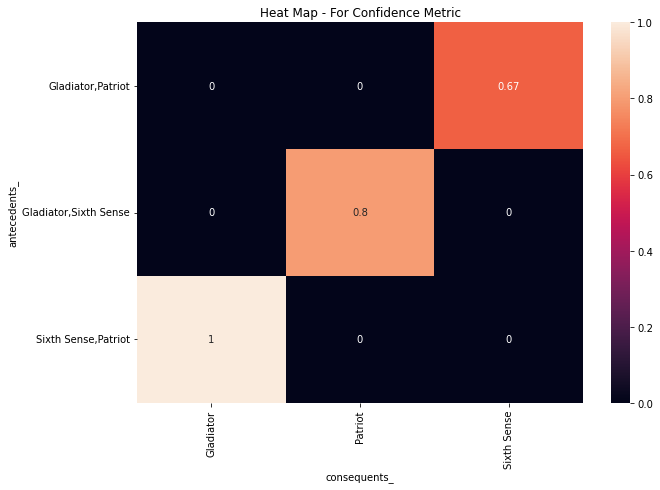

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(pivot,annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## 5.2 Forming the associations using Lift matrix

In [17]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.8)
print(rules_ap_li.shape)

(16, 9)


## 5.2.1 Replacing the frozen sets with string

In [18]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
12,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,2,"Sixth Sense,Patriot",Gladiator
10,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,2,"Gladiator,Sixth Sense",Patriot
11,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,2,"Gladiator,Patriot",Sixth Sense


In [20]:
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_', values= 'lift').fillna(0)
pivot

consequents_,Gladiator,Patriot,Sixth Sense
antecedents_,,,
"Gladiator,Patriot",0.000000,0.000000,1.111111
"Gladiator,Sixth Sense",0.000000,1.333333,0.000000
"Sixth Sense,Patriot",1.428571,0.000000,0.000000


## 5.2.2 Plotting the associations using the Heatmap

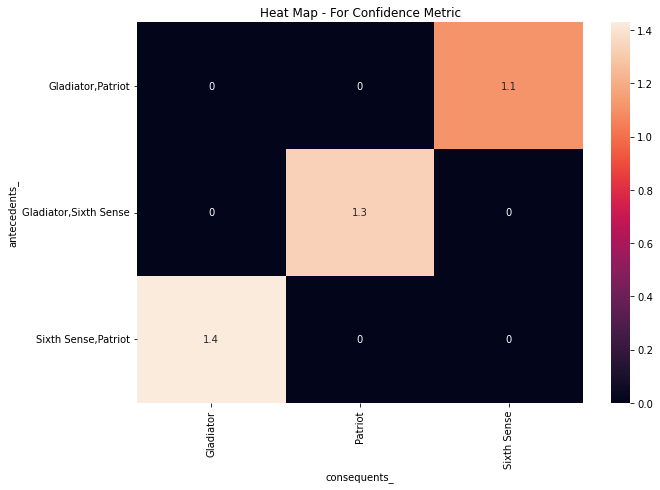

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(pivot,annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# 6. FP Growth Algorithm

In [22]:
frequent_itemsets_fp=fpgrowth(num_movie, min_support=0.1, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

10 itemset(s) from tree conditioned on items ()
3 itemset(s) from tree conditioned on items (Sixth Sense)
3 itemset(s) from tree conditioned on items (Green Mile)
3 itemset(s) from tree conditioned on items (LOTR2)
7 itemset(s) from tree conditioned on items (Harry Potter1)
15 itemset(s) from tree conditioned on items (LOTR1)
0 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Patriot)
3 itemset(s) from tree conditioned on items (Braveheart)
1 itemset(s) from tree conditioned on items (Harry Potter2)
7 itemset(s) from tree conditioned on items (LOTR)
(53, 2)


In [23]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()

,support,itemsets
5,0.7,(Gladiator)
0,0.6,(Sixth Sense)
41,0.6,"(Gladiator, Patriot)"
6,0.6,(Patriot)
10,0.5,"(Gladiator, Sixth Sense)"


## 6.1 Forming Associations using the confidence matrix

In [24]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)
print(rules_fp.head())

                antecedents    consequents  antecedent support  \
0             (Sixth Sense)    (Gladiator)                 0.6   
1  (Gladiator, Sixth Sense)      (Patriot)                 0.5   
2    (Sixth Sense, Patriot)    (Gladiator)                 0.4   
3              (Green Mile)  (Sixth Sense)                 0.2   
4   (Green Mile, Gladiator)  (Sixth Sense)                 0.1   

   consequent support  support  confidence      lift  leverage  conviction  
0                 0.7      0.5    0.833333  1.190476      0.08         1.8  
1                 0.6      0.4    0.800000  1.333333      0.10         2.0  
2                 0.7      0.4    1.000000  1.428571      0.12         inf  
3                 0.6      0.2    1.000000  1.666667      0.08         inf  
4                 0.6      0.1    1.000000  1.666667      0.04         inf  


In [25]:
rules_fp[(rules_fp.support > 0.1) & (rules_fp.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(8, 9)

## 6.1.1 Replacing the frozen sets with strings

In [26]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
126,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2,"Sixth Sense,LOTR","Green Mile,Gladiator"
54,"(LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2,"LOTR2,Harry Potter1","LOTR1,Sixth Sense"
88,"(Green Mile, LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3,"Green Mile,LOTR1,Harry Potter1","Sixth Sense,LOTR2"
87,"(LOTR1, Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3,"LOTR1,Sixth Sense,Harry Potter1","Green Mile,LOTR2"
86,"(Green Mile, LOTR1, Sixth Sense)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3,"Green Mile,LOTR1,Sixth Sense","LOTR2,Harry Potter1"


In [28]:
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_', values= 'confidence').fillna(0)
pivot

consequents_,Gladiator,"Gladiator,Sixth Sense",Green Mile,"Green Mile,Gladiator","Green Mile,Harry Potter1","Green Mile,LOTR1","Green Mile,LOTR1,Harry Potter1","Green Mile,LOTR1,LOTR2","Green Mile,LOTR1,Sixth Sense","Green Mile,LOTR2",...,LOTR2,"LOTR2,Harry Potter1",Patriot,Sixth Sense,"Sixth Sense,Green Mile,LOTR2","Sixth Sense,Harry Potter1","Sixth Sense,LOTR","Sixth Sense,LOTR1,LOTR2","Sixth Sense,LOTR2","Sixth Sense,LOTR2,Harry Potter1"
antecedents_,,,,,,,,,,,,,,,,,,,,,
"Braveheart,Patriot",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Gladiator,Braveheart",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Gladiator,LOTR",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"Gladiator,Sixth Sense",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Green Mile,Gladiator",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
"Green Mile,Gladiator,LOTR",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"Green Mile,Gladiator,Sixth Sense",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Green Mile,Harry Potter1",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
"Green Mile,LOTR",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6.1.2 Plotting the associations using the Heatmap

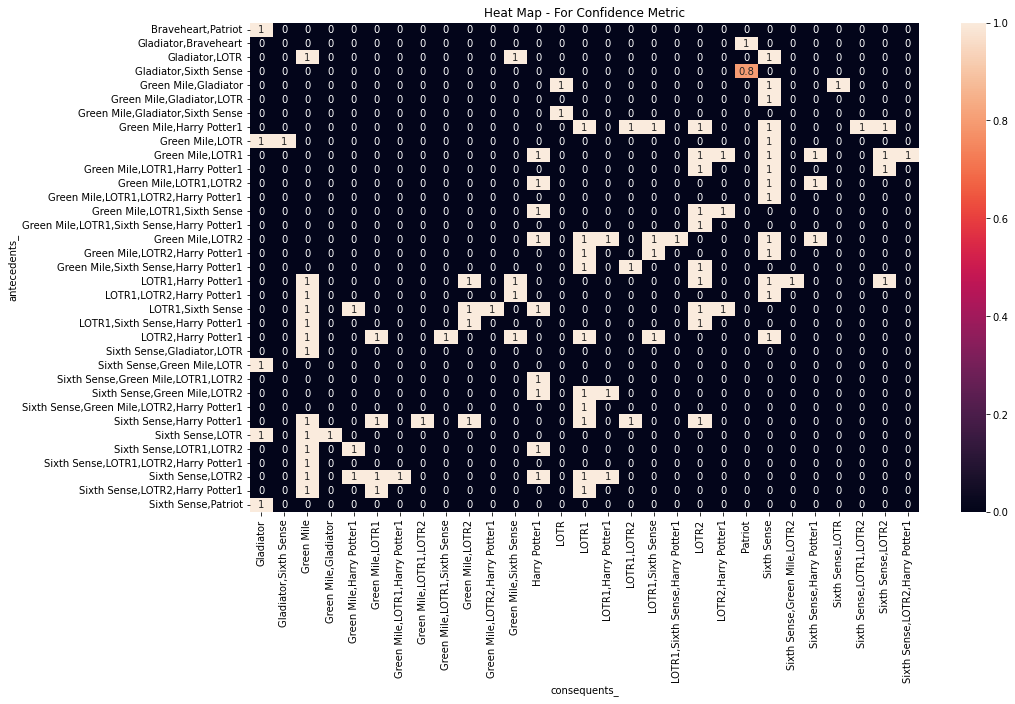

In [30]:
plt.figure(figsize=(15,9))
sns.heatmap(pivot,annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## 6.2 Forming the associations using the Lift matrix

In [31]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.8)
print(rules_fp_li.shape)

(246, 9)


## 6.2.1 Replacing the frozen sets with strings

In [32]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items,antecedents_,consequents_
241,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf,2,"Sixth Sense,LOTR","Green Mile,Gladiator"
177,"(Green Mile, LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3,"Green Mile,LOTR1,Harry Potter1","Sixth Sense,LOTR2"
176,"(LOTR1, Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3,"LOTR1,Sixth Sense,Harry Potter1","Green Mile,LOTR2"
175,"(Green Mile, LOTR1, Sixth Sense)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3,"Green Mile,LOTR1,Sixth Sense","LOTR2,Harry Potter1"
174,"(Green Mile, LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,3,"Green Mile,LOTR2,Harry Potter1","LOTR1,Sixth Sense"


In [34]:
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_',columns = 'consequents_', values= 'lift').fillna(0)
pivot

consequents_,Braveheart,Gladiator,"Gladiator,LOTR","Gladiator,Sixth Sense",Green Mile,"Green Mile,Gladiator","Green Mile,Harry Potter1","Green Mile,LOTR","Green Mile,LOTR1","Green Mile,LOTR1,Harry Potter1",...,LOTR2,"LOTR2,Harry Potter1",Patriot,Sixth Sense,"Sixth Sense,Green Mile,LOTR2","Sixth Sense,Harry Potter1","Sixth Sense,LOTR","Sixth Sense,LOTR1,LOTR2","Sixth Sense,LOTR2","Sixth Sense,LOTR2,Harry Potter1"
antecedents_,,,,,,,,,,,,,,,,,,,,,
"Braveheart,Patriot",0.000000,1.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"Gladiator,Braveheart",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"Gladiator,LOTR",0.000000,0.000000,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.666667,0.0,0.0,0.0,0.0,0.0,0.0
"Gladiator,Patriot",1.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.111111,0.0,0.0,0.0,0.0,0.0,0.0
"Gladiator,Sixth Sense",0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"Green Mile,Gladiator",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.666667,0.0,0.0,10.0,0.0,0.0,0.0
"Green Mile,Gladiator,LOTR",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.666667,0.0,0.0,0.0,0.0,0.0,0.0
"Green Mile,Gladiator,Sixth Sense",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
"Green Mile,Harry Potter1",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.000000,1.666667,0.0,0.0,0.0,10.0,10.0,0.0


## 6.2.2 Plotting the Associations using the Heatmap

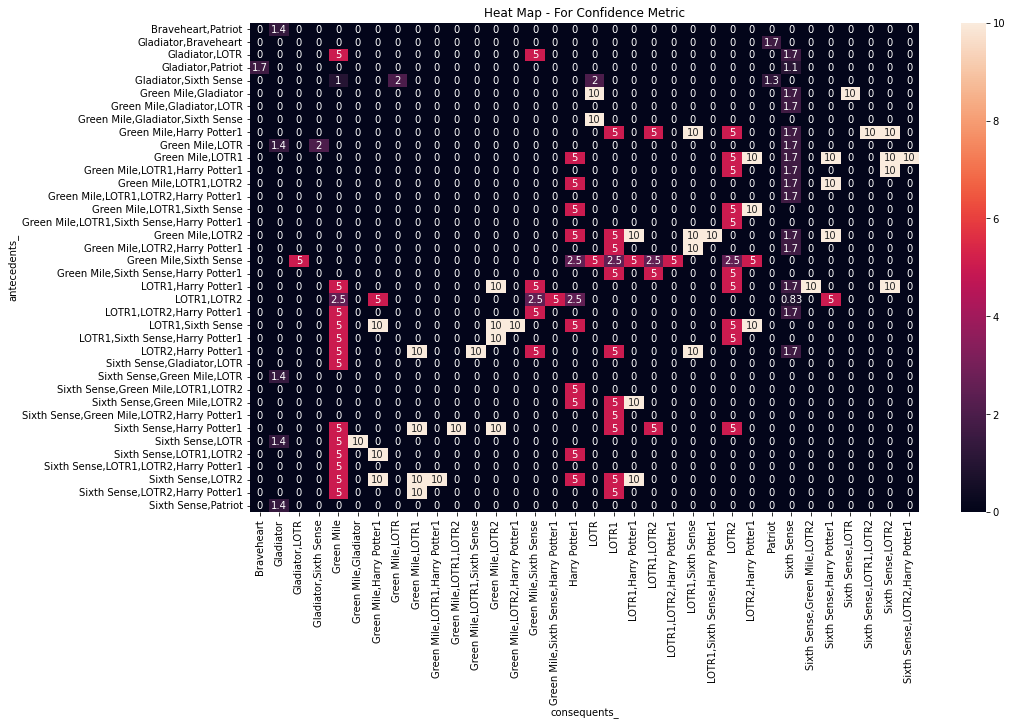

In [35]:
plt.figure(figsize=(15,9))
sns.heatmap(pivot,annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## b) Minimum Support = 0.05

In [14]:
frequent_itemsets_2 = apriori(num_movie, min_support=0.5, use_colnames=True)
frequent_itemsets_2.head()

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.6,"(Gladiator, Patriot)"


In [17]:
best_assoc_2 = association_rules(frequent_itemsets_2, metric="confidence", min_threshold=0.2)
best_assoc_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


## We can clearly see as we changed the min support from 0.15 to 0.5 the Associations reduced to 4 from 15. Thus , we can conclude that the best asscociation rules is at support 0.15 and min_threshold 0.2. 

# ====================== THE END =========================